In [1]:
pip install scipy

Note: you may need to restart the kernel to use updated packages.


In [27]:
import seaborn as sns
# Preprocessing allows us to standarsize our data
from sklearn import preprocessing
# Allows us to split our data into training and testing data
from sklearn.model_selection import train_test_split
# Allows us to test parameters of classification algorithms and find the best one
from sklearn.model_selection import GridSearchCV
# Logistic Regression classification algorithm
from sklearn.linear_model import LogisticRegression
# Support Vector Machine classification algorithm
from sklearn.svm import SVC
# Decision Tree classification algorithm
from sklearn.tree import DecisionTreeClassifier
# K Nearest Neighbors classification algorithm
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
import matplotlib as plt

In [28]:
def plot_confusion_matrix(y,y_predict):
    "this function plots the confusion matrix"
    from sklearn.metrics import confusion_matrix

    cm = confusion_matrix(y, y_predict)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(['no reduction', 'max reduction']); ax.yaxis.set_ticklabels(['no reduction', 'reduced'])

In [29]:
data = pd.read_csv("C:/Users/ss_le/Documents/WIDS 2022/Data/widsdatathon2022/train.csv")
data.head()

,Year_Factor,State_Factor,building_class,facility_type,floor_area,year_built,energy_star_rating,ELEVATION,january_min_temp,january_avg_temp,...,days_above_80F,days_above_90F,days_above_100F,days_above_110F,direction_max_wind_speed,direction_peak_wind_speed,max_wind_speed,days_with_fog,site_eui,id
0,1,State_1,Commercial,Grocery_store_or_food_market,61242.0,1942.0,11.0,2.4,36,50.5,...,14,0,0,0,1.0,1.0,1.0,NaN,248.682615,0
1,1,State_1,Commercial,Warehouse_Distribution_or_Shipping_center,274000.0,1955.0,45.0,1.8,36,50.5,...,14,0,0,0,1.0,NaN,1.0,12.0,26.500150,1
2,1,State_1,Commercial,Retail_Enclosed_mall,280025.0,1951.0,97.0,1.8,36,50.5,...,14,0,0,0,1.0,NaN,1.0,12.0,24.693619,2
3,1,State_1,Commercial,Education_Other_classroom,55325.0,1980.0,46.0,1.8,36,50.5,...,14,0,0,0,1.0,NaN,1.0,12.0,48.406926,3
4,1,State_1,Commercial,Warehouse_Nonrefrigerated,66000.0,1985.0,100.0,2.4,36,50.5,...,14,0,0,0,1.0,1.0,1.0,NaN,3.899395,4


In [30]:
data.building_class.value_counts()

Residential    43558
Commercial     32199
Name: building_class, dtype: int64

In [31]:
#Identify and calculate the percentage of the missing values in each attribute
data.isnull().sum()/data.count()*100

Year_Factor                    0.000000
State_Factor                   0.000000
building_class                 0.000000
facility_type                  0.000000
floor_area                     0.000000
                                ...    
direction_peak_wind_speed    123.169151
max_wind_speed               118.477289
days_with_fog                152.852041
site_eui                       0.000000
id                             0.000000
Length: 64, dtype: float64

In [32]:
data.dtypes

Year_Factor                    int64
State_Factor                  object
building_class                object
facility_type                 object
floor_area                   float64
                              ...   
direction_peak_wind_speed    float64
max_wind_speed               float64
days_with_fog                float64
site_eui                     float64
id                             int64
Length: 64, dtype: object

In [33]:
data.facility_type.value_counts()

Multifamily_Uncategorized                    39455
Office_Uncategorized                         12512
Education_Other_classroom                     3860
Lodging_Hotel                                 2098
2to4_Unit_Building                            1893
Commercial_Other                              1744
5plus_Unit_Building                           1273
Warehouse_Nonrefrigerated                     1255
Retail_Uncategorized                          1130
Education_College_or_university               1056
Nursing_Home                                   772
Education_Uncategorized                        709
Mixed_Use_Commercial_and_Residential           672
Lodging_Dormitory_or_fraternity_sorority       669
Warehouse_Distribution_or_Shipping_center      604
Warehouse_Selfstorage                          577
Grocery_store_or_food_market                   448
Office_Medical_non_diagnostic                  447
Health_Care_Inpatient                          409
Religious_worship              

In [34]:
eui_outcomes = data.site_eui.value_counts()
print(eui_outcomes)

79.781421    36
65.819672    36
69.210383    35
75.094262    35
88.557377    33
             ..
10.396353     1
75.600517     1
66.252720     1
65.090565     1
29.154684     1
Name: site_eui, Length: 61080, dtype: int64


In [35]:
print(data.shape)

(75757, 64)


In [36]:
data.describe()

,Year_Factor,floor_area,year_built,energy_star_rating,ELEVATION,january_min_temp,january_avg_temp,january_max_temp,february_min_temp,february_avg_temp,...,days_above_80F,days_above_90F,days_above_100F,days_above_110F,direction_max_wind_speed,direction_peak_wind_speed,max_wind_speed,days_with_fog,site_eui,id
count,75757.000000,7.575700e+04,73920.000000,49048.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,...,75757.000000,75757.000000,75757.000000,75757.000000,34675.000000,33946.000000,34675.000000,29961.000000,75757.000000,75757.000000
mean,4.367755,1.659839e+05,1952.306764,61.048605,39.506323,11.432343,34.310468,59.054952,11.720567,35.526837,...,82.709809,14.058701,0.279539,0.002442,66.552675,62.779974,4.190601,109.142051,82.584693,37878.000000
std,1.471441,2.468758e+05,37.053619,28.663683,60.656596,9.381027,6.996108,5.355458,12.577272,8.866697,...,25.282913,10.943996,2.252323,0.142140,131.147834,130.308106,6.458789,50.699751,58.255403,21869.306509
min,1.000000,9.430000e+02,0.000000,0.000000,-6.400000,-19.000000,10.806452,42.000000,-13.000000,13.250000,...,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,12.000000,1.001169,0.000000
25%,3.000000,6.237900e+04,1927.000000,40.000000,11.900000,6.000000,29.827586,56.000000,2.000000,31.625000,...,72.000000,6.000000,0.000000,0.000000,1.000000,1.000000,1.000000,88.000000,54.528601,18939.000000
50%,5.000000,9.136700e+04,1951.000000,67.000000,25.000000,11.000000,34.451613,59.000000,9.000000,34.107143,...,84.000000,12.000000,0.000000,0.000000,1.000000,1.000000,1.000000,104.000000,75.293716,37878.000000
75%,6.000000,1.660000e+05,1977.000000,85.000000,42.700000,13.000000,37.322581,62.000000,20.000000,40.879310,...,97.000000,17.000000,0.000000,0.000000,1.000000,1.000000,1.000000,131.000000,97.277534,56817.000000
max,6.000000,6.385382e+06,2015.000000,100.000000,1924.500000,49.000000,64.758065,91.000000,48.000000,65.107143,...,260.000000,185.000000,119.000000,16.000000,360.000000,360.000000,23.300000,311.000000,997.866120,75756.000000


In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75757 entries, 0 to 75756
Data columns (total 64 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Year_Factor                75757 non-null  int64  
 1   State_Factor               75757 non-null  object 
 2   building_class             75757 non-null  object 
 3   facility_type              75757 non-null  object 
 4   floor_area                 75757 non-null  float64
 5   year_built                 73920 non-null  float64
 6   energy_star_rating         49048 non-null  float64
 7   ELEVATION                  75757 non-null  float64
 8   january_min_temp           75757 non-null  int64  
 9   january_avg_temp           75757 non-null  float64
 10  january_max_temp           75757 non-null  int64  
 11  february_min_temp          75757 non-null  int64  
 12  february_avg_temp          75757 non-null  float64
 13  february_max_temp          75757 non-null  int

In [38]:
data.isna().sum()

Year_Factor                      0
State_Factor                     0
building_class                   0
facility_type                    0
floor_area                       0
                             ...  
direction_peak_wind_speed    41811
max_wind_speed               41082
days_with_fog                45796
site_eui                         0
id                               0
Length: 64, dtype: int64

In [39]:
data.State_Factor.value_counts ()
  

State_6     50840
State_11     6412
State_1      5618
State_2      4871
State_4      4300
State_8      3701
State_10       15
Name: State_Factor, dtype: int64

In [40]:
data.building_class.value_counts ()             


Residential    43558
Commercial     32199
Name: building_class, dtype: int64

In [41]:
data.facility_type.value_counts () 

Multifamily_Uncategorized                    39455
Office_Uncategorized                         12512
Education_Other_classroom                     3860
Lodging_Hotel                                 2098
2to4_Unit_Building                            1893
Commercial_Other                              1744
5plus_Unit_Building                           1273
Warehouse_Nonrefrigerated                     1255
Retail_Uncategorized                          1130
Education_College_or_university               1056
Nursing_Home                                   772
Education_Uncategorized                        709
Mixed_Use_Commercial_and_Residential           672
Lodging_Dormitory_or_fraternity_sorority       669
Warehouse_Distribution_or_Shipping_center      604
Warehouse_Selfstorage                          577
Grocery_store_or_food_market                   448
Office_Medical_non_diagnostic                  447
Health_Care_Inpatient                          409
Religious_worship              

C:\Users\ss_le\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution - EUI')

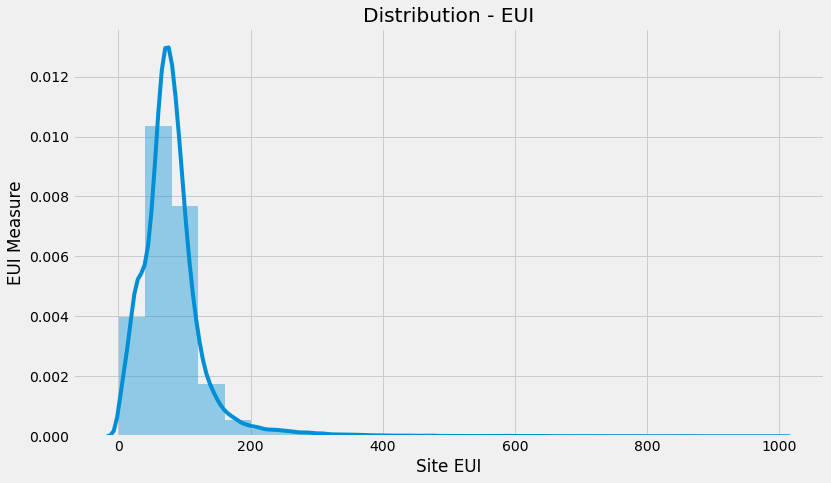

In [42]:
from matplotlib import pyplot as plt
plt.style.use('fivethirtyeight')
plt.figure(figsize=(12,7))
sns.distplot(data.site_eui, bins = 25)
plt.ticklabel_format(style='plain', axis='x',scilimits=(0,1))
plt.xlabel("Site EUI")
plt.ylabel("EUI Measure")
plt.title("Distribution - EUI")

In [43]:
print("Skew is:", data.site_eui.skew())
print("Kurtosis: %f" % data.site_eui.kurt())
#right skewed --cauchy distribution

Skew is: 4.739972264741652
Kurtosis: 43.385673


In [44]:
import numpy as np
numeric_features=data.select_dtypes(include=[np.number])
numeric_features.dtypes

Year_Factor                    int64
floor_area                   float64
year_built                   float64
energy_star_rating           float64
ELEVATION                    float64
                              ...   
direction_peak_wind_speed    float64
max_wind_speed               float64
days_with_fog                float64
site_eui                     float64
id                             int64
Length: 61, dtype: object

In [45]:
corr=numeric_features.corr()
corr

,Year_Factor,floor_area,year_built,energy_star_rating,ELEVATION,january_min_temp,january_avg_temp,january_max_temp,february_min_temp,february_avg_temp,...,days_above_80F,days_above_90F,days_above_100F,days_above_110F,direction_max_wind_speed,direction_peak_wind_speed,max_wind_speed,days_with_fog,site_eui,id
Year_Factor,1.000000,-0.036363,0.084143,-0.005052,0.132855,0.007913,-0.099628,-0.291137,-0.391312,-0.101799,...,0.185233,0.054718,-0.043701,-0.013635,0.231525,0.214651,0.233857,0.619227,-0.045179,0.534754
floor_area,-0.036363,1.000000,0.100878,0.034947,0.097797,-0.148467,-0.137654,-0.104118,-0.106110,-0.120068,...,0.049897,0.022583,-0.031415,-0.009205,-0.000018,-0.003984,-0.000922,0.014282,0.073967,-0.090856
year_built,0.084143,0.100878,1.000000,-0.073857,0.047803,-0.011210,-0.032846,-0.080230,-0.000619,-0.020201,...,-0.035519,-0.005065,-0.054164,NaN,0.001168,-0.009591,0.004945,0.084167,0.017162,0.053929
energy_star_rating,-0.005052,0.034947,-0.073857,1.000000,-0.016783,0.144452,0.149421,0.081703,0.126411,0.137479,...,-0.074993,0.019541,0.059382,NaN,-0.000992,0.002014,-0.000333,0.019387,-0.511012,-0.025448
ELEVATION,0.132855,0.097797,0.047803,-0.016783,1.000000,-0.255502,-0.233452,-0.345130,-0.153185,-0.184543,...,0.062014,0.184423,0.104934,0.077188,0.050804,0.074144,0.040172,0.495345,0.011798,-0.201664
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
direction_peak_wind_speed,0.214651,-0.003984,-0.009591,0.002014,0.074144,-0.159938,-0.257252,-0.281605,-0.328404,-0.679818,...,0.467093,-0.027694,-0.026805,0.023397,0.999784,1.000000,0.992227,0.330064,0.013589,0.210752
max_wind_speed,0.233857,-0.000922,0.004945,-0.000333,0.040172,-0.162500,-0.271260,-0.302567,-0.349035,-0.694419,...,0.491481,-0.025128,-0.019491,0.018086,0.988797,0.992227,1.000000,0.353990,0.010639,0.218777
days_with_fog,0.619227,0.014282,0.084167,0.019387,0.495345,-0.035741,-0.108595,-0.321699,-0.286155,-0.173583,...,0.084892,0.048981,-0.207379,NaN,0.330441,0.330064,0.353990,1.000000,-0.055388,0.301534
site_eui,-0.045179,0.073967,0.017162,-0.511012,0.011798,-0.179190,-0.167982,-0.097070,-0.147348,-0.154071,...,0.086347,-0.007980,-0.050029,-0.014190,0.010217,0.013589,0.010639,-0.055388,1.000000,-0.026500


In [46]:
print(corr['site_eui'].sort_values(ascending=False))

site_eui               1.000000
snowfall_inches        0.157284
heating_degree_days    0.147861
days_below_30F         0.139811
july_avg_temp          0.133856
                         ...   
february_min_temp     -0.147348
february_avg_temp     -0.154071
january_avg_temp      -0.167982
january_min_temp      -0.179190
energy_star_rating    -0.511012
Name: site_eui, Length: 61, dtype: float64


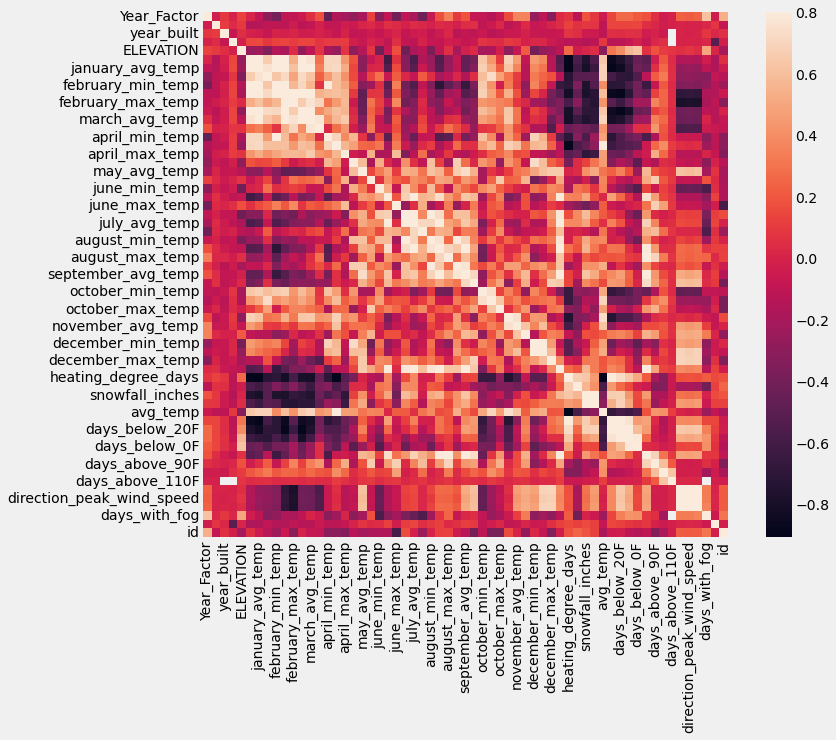

In [47]:
f, ax =plt.subplots(figsize=(12,9))
sns.heatmap(corr, vmax=.8, square=True);

In [48]:
#year_factor, elevation,avg-temp,snowfall_inches,direction_peak_wind_speed,days_with_fog,days_below_20F,days_below_0F,days_above_90F

C:\Users\ss_le\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='State_Factor', ylabel='count'>

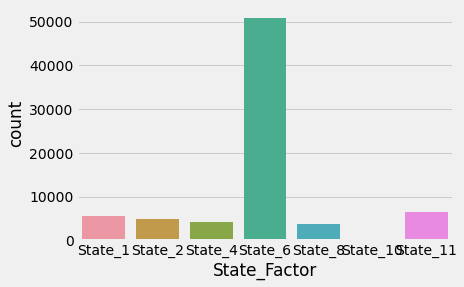

In [49]:
sns.countplot(data.State_Factor)

C:\Users\ss_le\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='building_class', ylabel='count'>

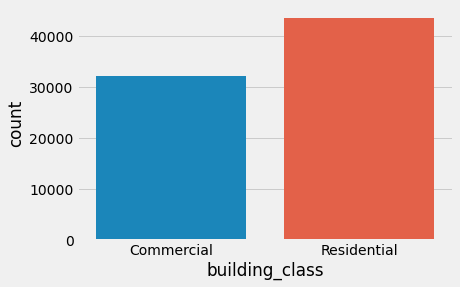

In [50]:
sns.countplot(data.building_class)

C:\Users\ss_le\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59]),
 [Text(0, 0, 'Grocery_store_or_food_market'),
  Text(1, 0, 'Warehouse_Distribution_or_Shipping_center'),
  Text(2, 0, 'Retail_Enclosed_mall'),
  Text(3, 0, 'Education_Other_classroom'),
  Text(4, 0, 'Warehouse_Nonrefrigerated'),
  Text(5, 0, 'Warehouse_Selfstorage'),
  Text(6, 0, 'Office_Uncategorized'),
  Text(7, 0, 'Data_Center'),
  Text(8, 0, 'Commercial_Other'),
  Text(9, 0, 'Mixed_Use_Predominantly_Commercial'),
  Text(10, 0, 'Office_Medical_non_diagnostic'),
  Text(11, 0, 'Education_College_or_university'),
  Text(12, 0, 'Industrial'),
  Text(13, 0, 'Laboratory'),
  Text(14, 0, 'Public_Assembly_Entertainment_culture'),
  Text(15, 0, 'Retail_Vehicle_dealership_showroom'),
  Text(16, 0, 'Retail_Uncategorized'),
 

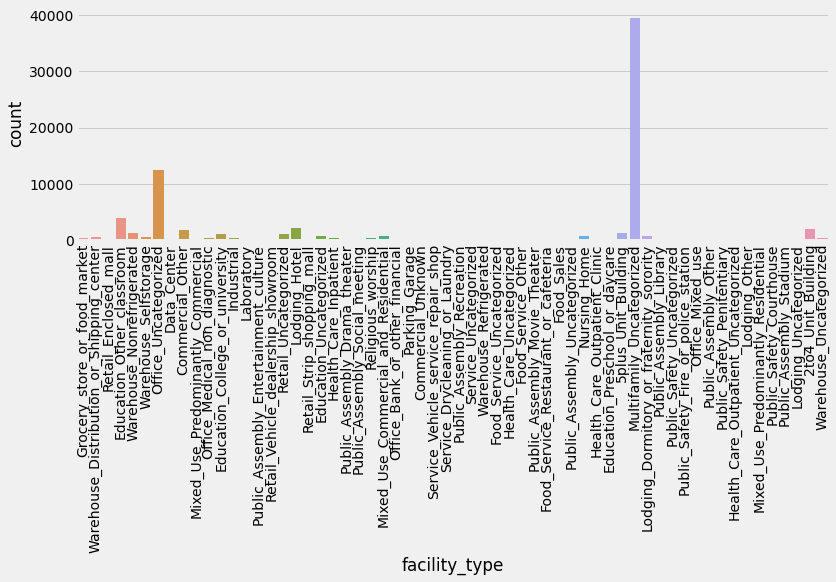

In [51]:
plt.figure(figsize=(12,4))
sns.countplot(data.facility_type)
plt.xticks(rotation=90)

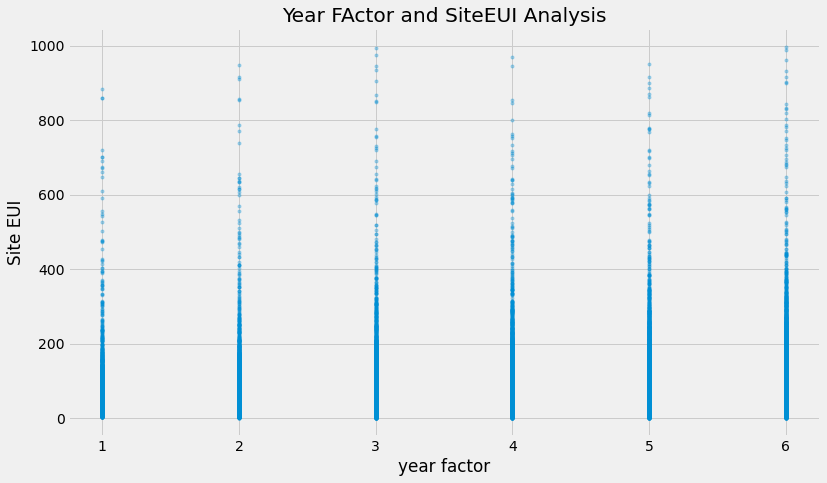

In [52]:
plt.figure(figsize=(12,7))
plt.xlabel("year factor")
plt.ylabel("Site EUI")
plt.title("Year FActor and SiteEUI Analysis")
plt.plot(data.Year_Factor,data["site_eui"],'.',alpha=0.3)

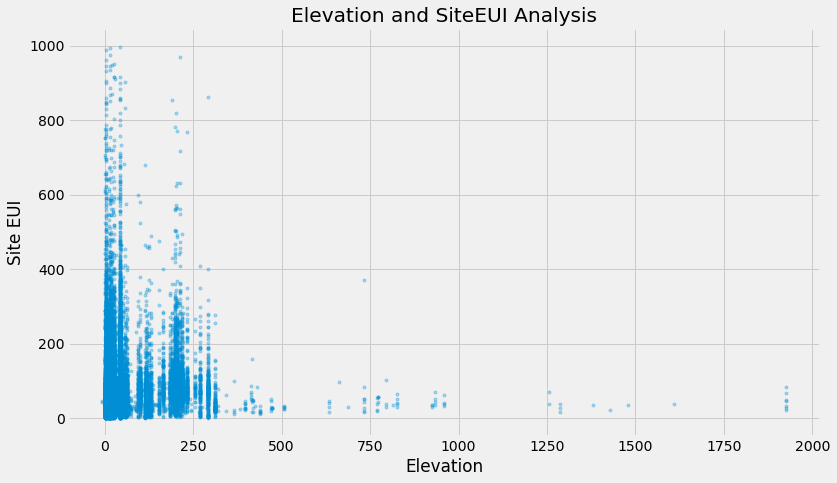

In [53]:
plt.figure(figsize=(12,7))
plt.xlabel("Elevation")
plt.ylabel("Site EUI")
plt.title("Elevation and SiteEUI Analysis")
plt.plot(data.ELEVATION,data["site_eui"],'.',alpha=0.3)

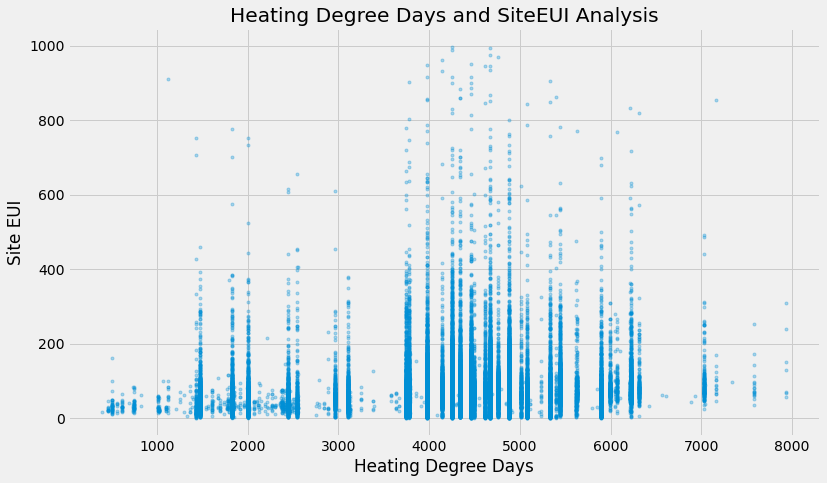

In [54]:
plt.figure(figsize=(12,7))
plt.xlabel("Heating Degree Days")
plt.ylabel("Site EUI")
plt.title("Heating Degree Days and SiteEUI Analysis")
plt.plot(data.heating_degree_days,data["site_eui"],'.',alpha=0.3)

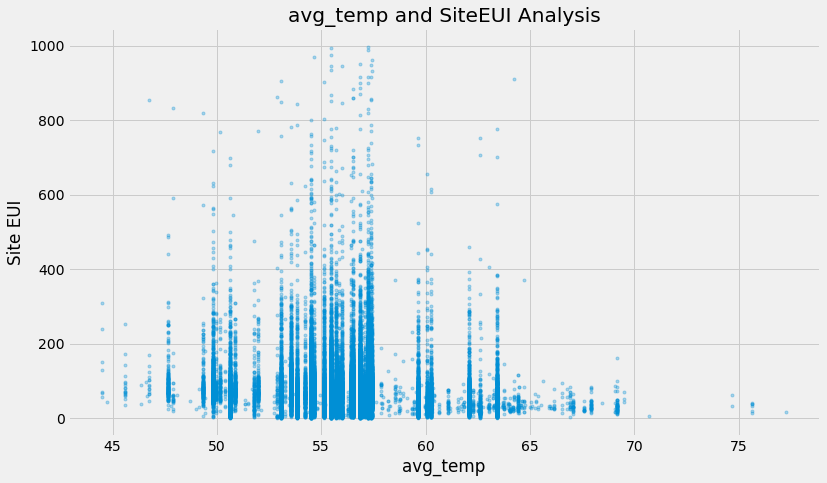

In [55]:
plt.figure(figsize=(12,7))
plt.xlabel("avg_temp")
plt.ylabel("Site EUI")
plt.title("avg_temp and SiteEUI Analysis")
plt.plot(data.avg_temp,data["site_eui"],'.',alpha=0.3)

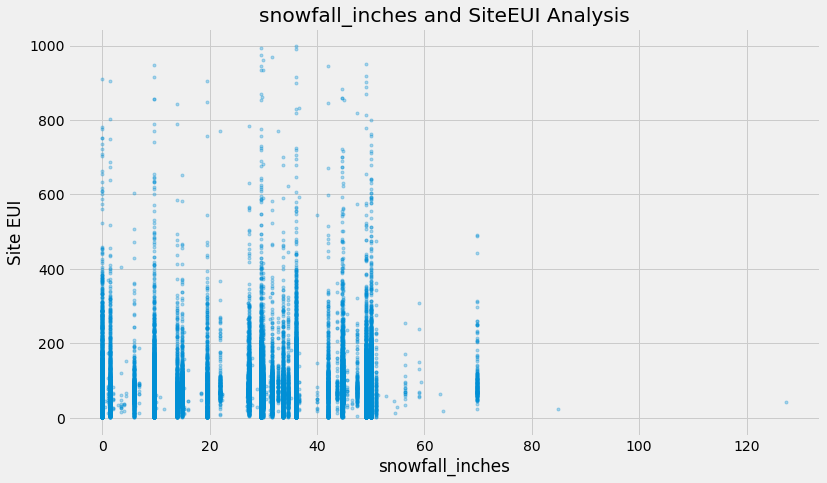

In [56]:
plt.figure(figsize=(12,7))
plt.xlabel("snowfall_inches")
plt.ylabel("Site EUI")
plt.title("snowfall_inches and SiteEUI Analysis")
plt.plot(data.snowfall_inches,data["site_eui"],'.',alpha=0.3)

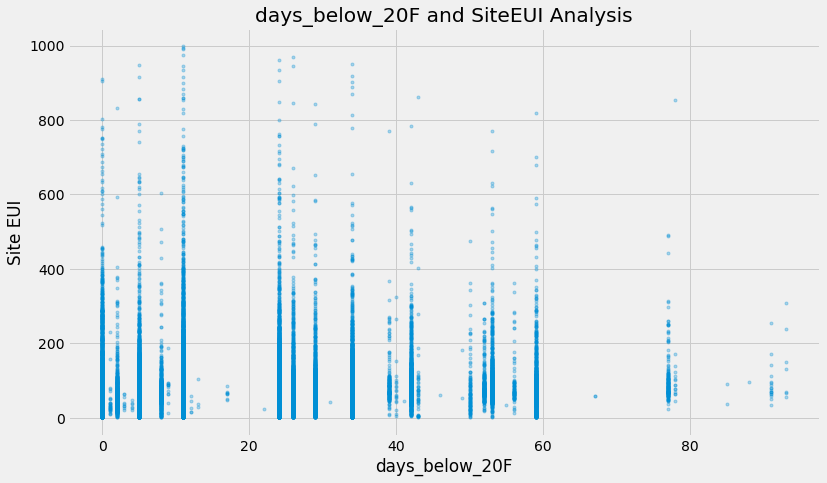

In [57]:
plt.figure(figsize=(12,7))
plt.xlabel("days_below_20F")
plt.ylabel("Site EUI")
plt.title("days_below_20F and SiteEUI Analysis")
plt.plot(data.days_below_20F,data["site_eui"],'.',alpha=0.3)

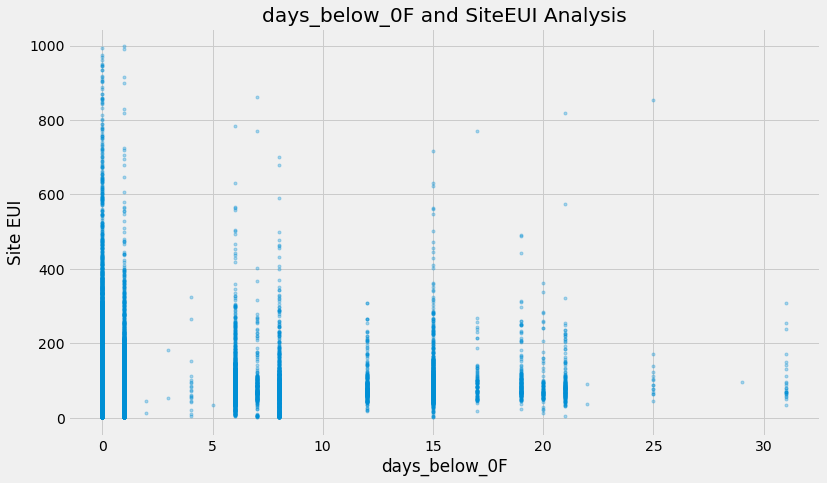

In [58]:
plt.figure(figsize=(12,7))
plt.xlabel("days_below_0F")
plt.ylabel("Site EUI")
plt.title("days_below_0F and SiteEUI Analysis")
plt.plot(data.days_below_0F,data["site_eui"],'.',alpha=0.3)

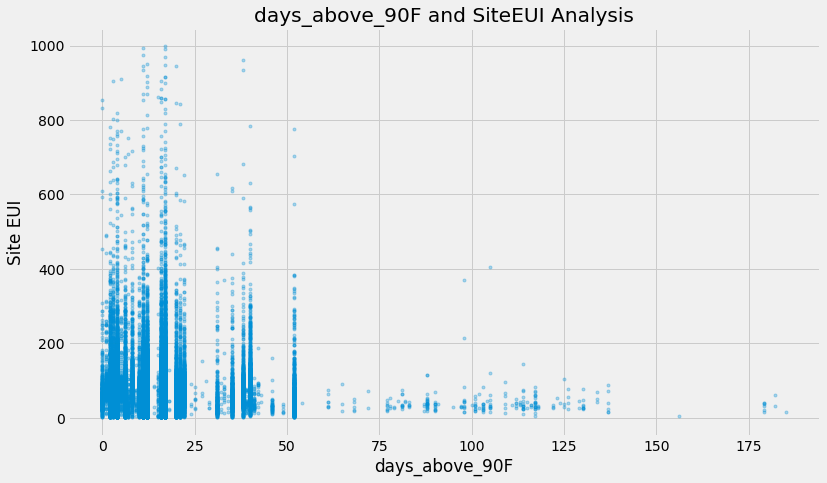

In [59]:
plt.figure(figsize=(12,7))
plt.xlabel("days_above_90F")
plt.ylabel("Site EUI")
plt.title("days_above_90F and SiteEUI Analysis")
plt.plot(data.days_above_90F,data["site_eui"],'.',alpha=0.3)

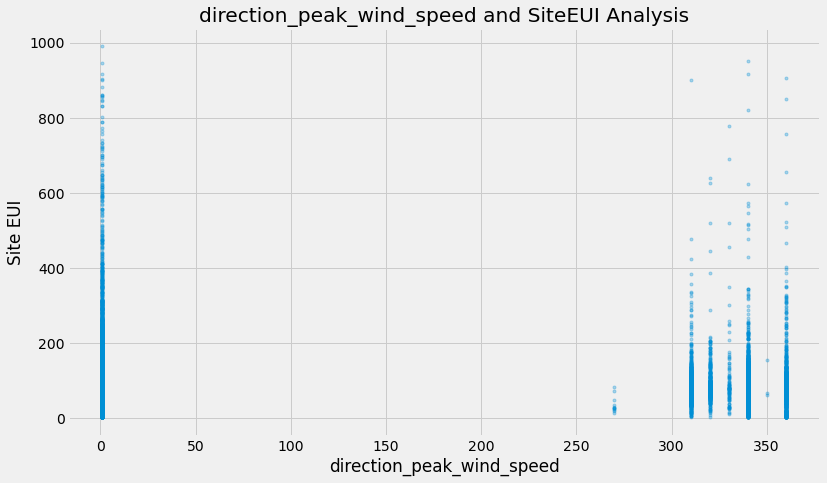

In [60]:
#,direction_peak_wind_speed,days_with_fog
plt.figure(figsize=(12,7))
plt.xlabel("direction_peak_wind_speed")
plt.ylabel("Site EUI")
plt.title("direction_peak_wind_speed and SiteEUI Analysis")
plt.plot(data.direction_peak_wind_speed,data["site_eui"],'.',alpha=0.3)

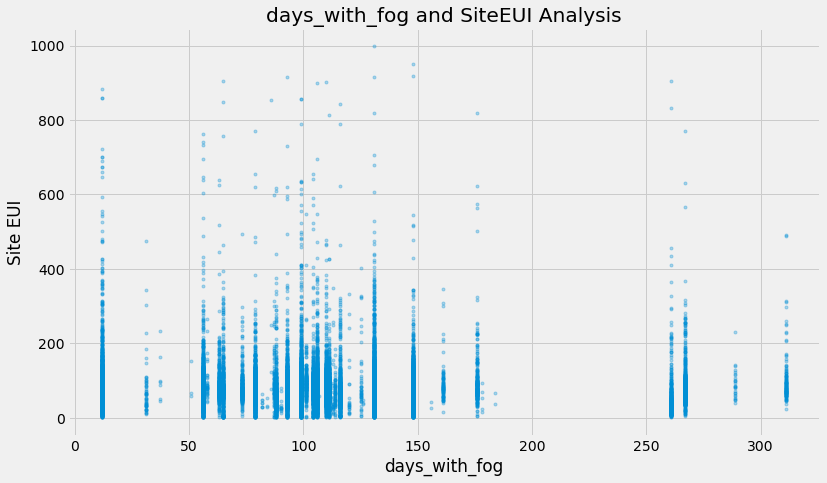

In [61]:
#,direction_peak_wind_speed,days_with_fog
plt.figure(figsize=(12,7))
plt.xlabel("days_with_fog")
plt.ylabel("Site EUI")
plt.title("days_with_fog and SiteEUI Analysis")
plt.plot(data.days_with_fog,data["site_eui"],'.',alpha=0.3)

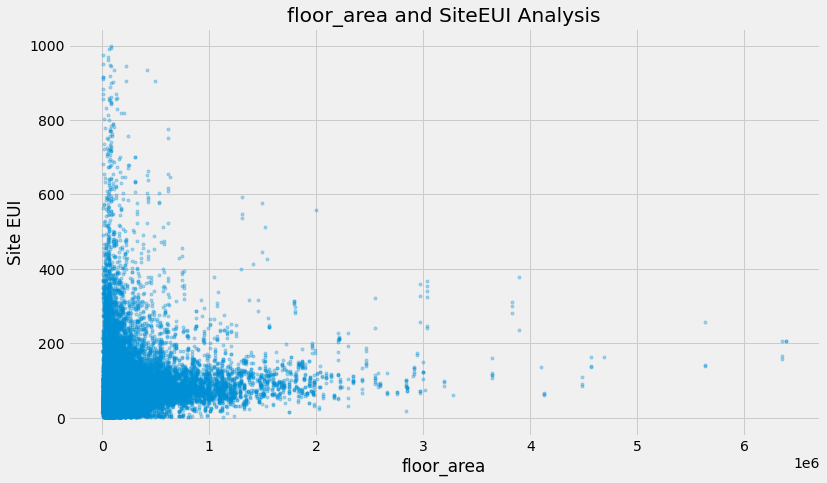

In [62]:
#,direction_peak_wind_speed,days_with_fog
plt.figure(figsize=(12,7))
plt.xlabel("floor_area")
plt.ylabel("Site EUI")
plt.title("floor_area and SiteEUI Analysis")
plt.plot(data.floor_area,data["site_eui"],'.',alpha=0.3)

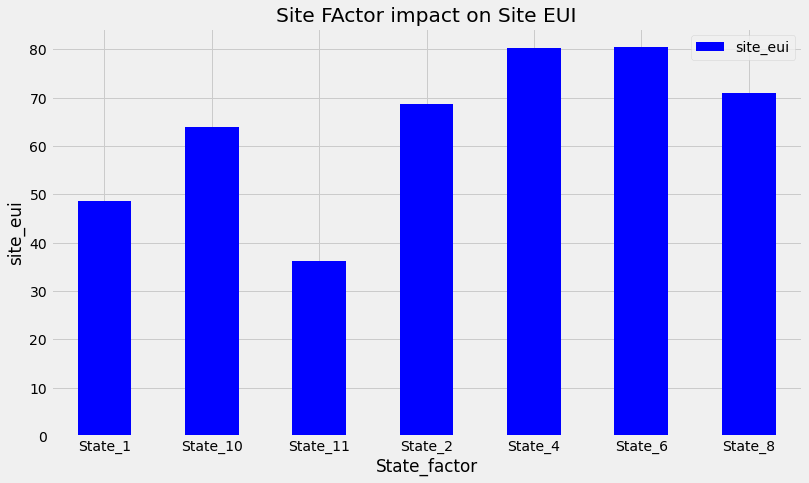

In [63]:
#Categorical State_factor, building_class, facility_type
state_factor_pivot = \
data.pivot_table(index='State_Factor',values='site_eui', aggfunc=np.median)
state_factor_pivot.plot(kind='bar',color='blue',figsize=(12,7))
plt.xlabel("State_factor")
plt.ylabel("site_eui")
plt.title("Site FActor impact on Site EUI")
plt.xticks(rotation=0)
plt.show()

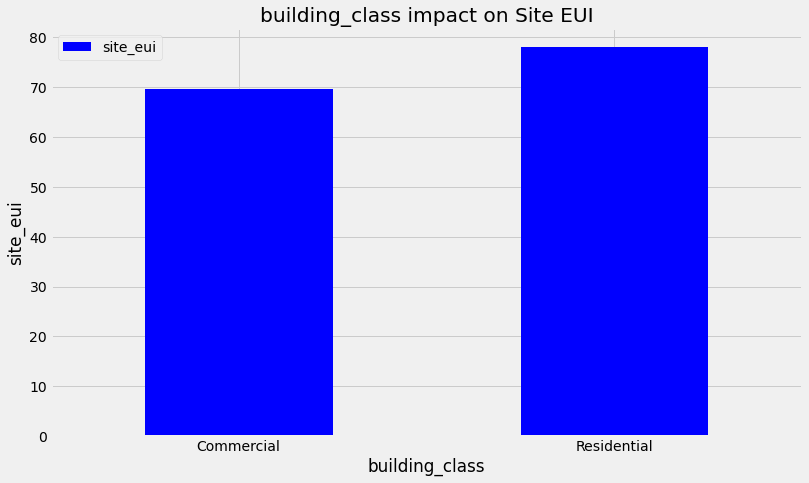

In [64]:
#Categorical State_factor, building_class, facility_type
state_factor_pivot = \
data.pivot_table(index='building_class',values='site_eui', aggfunc=np.median)
state_factor_pivot.plot(kind='bar',color='blue',figsize=(12,7))
plt.xlabel("building_class")
plt.ylabel("site_eui")
plt.title("building_class impact on Site EUI")
plt.xticks(rotation=0)
plt.show()

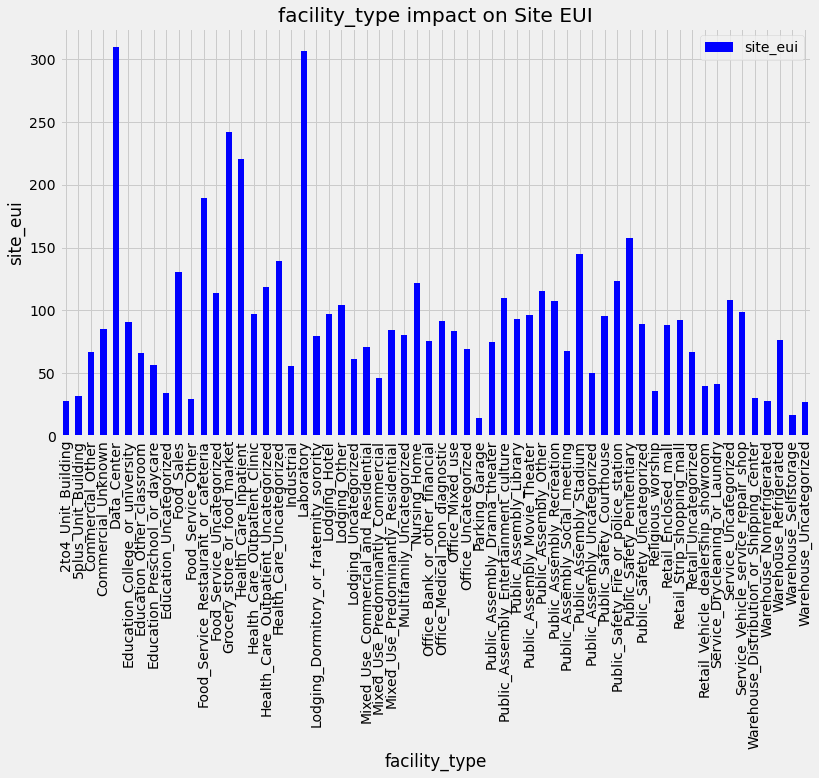

In [65]:
#Categorical State_factor, building_class, facility_type
state_factor_pivot = \
data.pivot_table(index='facility_type',values='site_eui', aggfunc=np.median)
state_factor_pivot.plot(kind='bar',color='blue',figsize=(12,7))
plt.xlabel("facility_type")
plt.ylabel("site_eui")
plt.title("facility_type impact on Site EUI")
plt.xticks(rotation=90)
plt.show()

In [66]:
data.pivot_table(values="building_class",columns="facility_type",aggfunc=lambda x:x.mode())

facility_type,2to4_Unit_Building,5plus_Unit_Building,Commercial_Other,Commercial_Unknown,Data_Center,Education_College_or_university,Education_Other_classroom,Education_Preschool_or_daycare,Education_Uncategorized,Food_Sales,...,Retail_Uncategorized,Retail_Vehicle_dealership_showroom,Service_Drycleaning_or_Laundry,Service_Uncategorized,Service_Vehicle_service_repair_shop,Warehouse_Distribution_or_Shipping_center,Warehouse_Nonrefrigerated,Warehouse_Refrigerated,Warehouse_Selfstorage,Warehouse_Uncategorized
building_class,Residential,Residential,Commercial,Commercial,Commercial,Commercial,Commercial,Commercial,Commercial,Commercial,...,Commercial,Commercial,Commercial,Commercial,Commercial,Commercial,Commercial,Commercial,Commercial,Commercial


In [67]:
#Highest is for DataCenter, Labortory which are of type commercial

In [68]:
data.pivot_table(values="State_Factor",columns="building_class",aggfunc=lambda x:x.mode())

building_class,Commercial,Residential
State_Factor,State_6,State_6


In [69]:
#State 6

In [70]:
data.pivot_table(values="State_Factor",columns="facility_type",aggfunc=lambda x:x.mode())

facility_type,2to4_Unit_Building,5plus_Unit_Building,Commercial_Other,Commercial_Unknown,Data_Center,Education_College_or_university,Education_Other_classroom,Education_Preschool_or_daycare,Education_Uncategorized,Food_Sales,...,Retail_Uncategorized,Retail_Vehicle_dealership_showroom,Service_Drycleaning_or_Laundry,Service_Uncategorized,Service_Vehicle_service_repair_shop,Warehouse_Distribution_or_Shipping_center,Warehouse_Nonrefrigerated,Warehouse_Refrigerated,Warehouse_Selfstorage,Warehouse_Uncategorized
State_Factor,State_11,State_11,State_6,State_2,State_6,State_6,State_6,State_6,State_1,State_8,...,State_6,State_1,State_1,State_8,State_6,State_6,State_6,State_6,State_6,State_11


In [71]:
#elevation,avg-temp,snowfall_inches,days_with_fog,days_below_20F,days_below_0F,days_above_90F
fld_null=data[["floor_area","ELEVATION","avg_temp","snowfall_inches","days_with_fog","days_below_20F","days_below_0F","days_above_90F"]].copy()
fld_null.head()

,floor_area,ELEVATION,avg_temp,snowfall_inches,days_with_fog,days_below_20F,days_below_0F,days_above_90F
0,61242.0,2.4,56.972603,0.0,NaN,0,0,0
1,274000.0,1.8,56.972603,0.0,12.0,0,0,0
2,280025.0,1.8,56.972603,0.0,12.0,0,0,0
3,55325.0,1.8,56.972603,0.0,12.0,0,0,0
4,66000.0,2.4,56.972603,0.0,NaN,0,0,0


In [72]:
fld_null.isna().sum()#---most fields of use not nan

floor_area             0
ELEVATION              0
avg_temp               0
snowfall_inches        0
days_with_fog      45796
days_below_20F         0
days_below_0F          0
days_above_90F         0
dtype: int64

In [128]:
df=data[['floor_area','energy_star_rating','ELEVATION','avg_temp','snowfall_inches','days_below_20F','days_above_90F','State_Factor','building_class','facility_type','id','site_eui']].copy()

In [129]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75757 entries, 0 to 75756
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   floor_area          75757 non-null  float64
 1   energy_star_rating  49048 non-null  float64
 2   ELEVATION           75757 non-null  float64
 3   avg_temp            75757 non-null  float64
 4   snowfall_inches     75757 non-null  float64
 5   days_below_20F      75757 non-null  int64  
 6   days_above_90F      75757 non-null  int64  
 7   State_Factor        75757 non-null  object 
 8   building_class      75757 non-null  object 
 9   facility_type       75757 non-null  object 
 10  id                  75757 non-null  int64  
 11  site_eui            75757 non-null  float64
dtypes: float64(6), int64(3), object(3)
memory usage: 6.9+ MB


<AxesSubplot:>

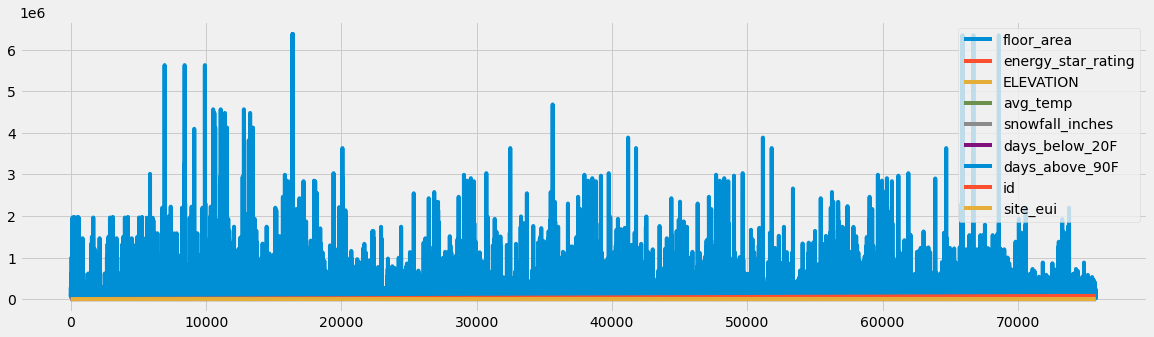

In [130]:
df.plot(figsize=(18,5))

array([[<AxesSubplot:title={'center':'floor_area'}>,
        <AxesSubplot:title={'center':'ELEVATION'}>,
        <AxesSubplot:title={'center':'avg_temp'}>],
       [<AxesSubplot:title={'center':'snowfall_inches'}>,
        <AxesSubplot:title={'center':'days_below_20F'}>,
        <AxesSubplot:title={'center':'days_above_90F'}>],
       [<AxesSubplot:title={'center':'id'}>,
        <AxesSubplot:title={'center':'site_eui'}>, <AxesSubplot:>]],
      dtype=object)

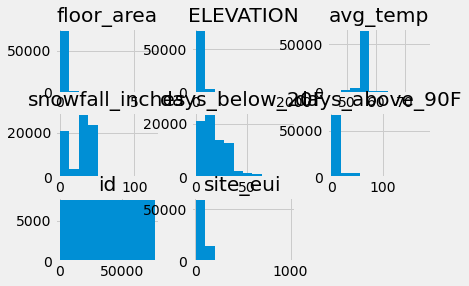

In [75]:
df.hist()

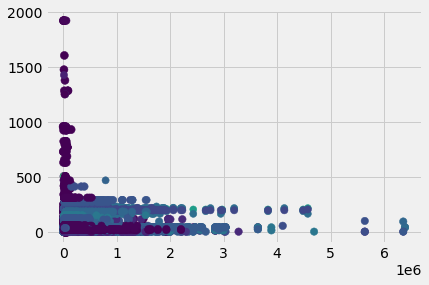

In [131]:
plt.scatter(df['floor_area'],df['ELEVATION'],df['avg_temp'],df['snowfall_inches'])
#df.dtypes

In [133]:
df.to_csv("C:/Users/ss_le/Documents/WIDS 2022/Data/widsdatathon2022/train_2.csv")
#target='site_eui'
#IDcol='ID'
#df.info()


In [241]:
train_df=pd.read_csv("C:/Users/ss_le/Documents/WIDS 2022/Data/widsdatathon2022/train_2.csv")
test_df=pd.read_csv("C:/Users/ss_le/Documents/WIDS 2022/Data/widsdatathon2022/test_2.csv")
data2 = pd.read_csv("C:/Users/ss_le/Documents/WIDS 2022/Data/widsdatathon2022/test.csv")

In [195]:
#linreg
from sklearn.linear_model import LinearRegression
train2=pd.get_dummies(df)
#xtrain = train_df.drop(['site_eui','days_below_20F','days_above_90F','id','State_Factor','building_class','facility_type'],axis=1)
#ytrain = train_df['site_eui']
#xtest = test_df.drop(['id'],axis=0).copy()
print(train2.head(5))
train2.info()
#lr=LinearRegression(normalize=True)
#xtrain = train_df.drop(['site_eui','days_below_20F','days_above_90F','id','State_Factor','building_class','facility_type'],axis=1)
#ytrain = train_df['site_eui']

   floor_area  energy_star_rating  ELEVATION   avg_temp  snowfall_inches  \
0     61242.0                11.0        2.4  56.972603              0.0   
1    274000.0                45.0        1.8  56.972603              0.0   
2    280025.0                97.0        1.8  56.972603              0.0   
3     55325.0                46.0        1.8  56.972603              0.0   
4     66000.0               100.0        2.4  56.972603              0.0   

   days_below_20F  days_above_90F  id    site_eui  State_Factor_State_1  ...  \
0               0               0   0  248.682615                     1  ...   
1               0               0   1   26.500150                     1  ...   
2               0               0   2   24.693619                     1  ...   
3               0               0   3   48.406926                     1  ...   
4               0               0   4    3.899395                     1  ...   

   facility_type_Retail_Uncategorized  \
0                    

In [82]:
#xtrain=pd.get_dummies(df)
#xtrain.head()

,floor_area,ELEVATION,avg_temp,snowfall_inches,days_below_20F,days_above_90F,id,site_eui,State_Factor_State_1,State_Factor_State_10,...,facility_type_Retail_Uncategorized,facility_type_Retail_Vehicle_dealership_showroom,facility_type_Service_Drycleaning_or_Laundry,facility_type_Service_Uncategorized,facility_type_Service_Vehicle_service_repair_shop,facility_type_Warehouse_Distribution_or_Shipping_center,facility_type_Warehouse_Nonrefrigerated,facility_type_Warehouse_Refrigerated,facility_type_Warehouse_Selfstorage,facility_type_Warehouse_Uncategorized
0,61242.0,2.4,56.972603,0.0,0,0,0,248.682615,1,0,...,0,0,0,0,0,0,0,0,0,0
1,274000.0,1.8,56.972603,0.0,0,0,1,26.500150,1,0,...,0,0,0,0,0,1,0,0,0,0
2,280025.0,1.8,56.972603,0.0,0,0,2,24.693619,1,0,...,0,0,0,0,0,0,0,0,0,0
3,55325.0,1.8,56.972603,0.0,0,0,3,48.406926,1,0,...,0,0,0,0,0,0,0,0,0,0
4,66000.0,2.4,56.972603,0.0,0,0,4,3.899395,1,0,...,0,0,0,0,0,0,1,0,0,0


In [83]:
lr.fit(xtrain,ytrain)

LinearRegression(normalize=True)

In [84]:
lr_accuracy=round(lr.score(xtrain,ytrain)* 100,2)
print(lr_accuracy)

100.0


In [205]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
train2.columns = train2.columns.to_series().apply(lambda x: x.strip())
np.random.seed(0)
dtrain6,dtest = train_test_split(train2,train_size=.7,test_size=.3,random_state=100)

In [212]:
dtest.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22728 entries, 23673 to 212
Data columns (total 77 columns):
 #   Column                                                   Non-Null Count  Dtype  
---  ------                                                   --------------  -----  
 0   floor_area                                               22728 non-null  float64
 1   energy_star_rating                                       14695 non-null  float64
 2   ELEVATION                                                22728 non-null  float64
 3   avg_temp                                                 22728 non-null  float64
 4   snowfall_inches                                          22728 non-null  float64
 5   days_below_20F                                           22728 non-null  float64
 6   days_above_90F                                           22728 non-null  float64
 7   id                                                       22728 non-null  int64  
 8   State_Factor_State_1    

In [198]:
from sklearn.preprocessing import MinMaxScaler
scaler= MinMaxScaler()
num_vars =['site_eui','floor_area','energy_star_rating','ELEVATION','avg_temp','snowfall_inches','days_below_20F','days_above_90F']
dtrain[num_vars] = scaler.fit_transform(dtrain[num_vars])
dtrain

,floor_area,energy_star_rating,ELEVATION,avg_temp,snowfall_inches,days_below_20F,days_above_90F,id,site_eui,State_Factor_State_1,...,facility_type_Retail_Uncategorized,facility_type_Retail_Vehicle_dealership_showroom,facility_type_Service_Drycleaning_or_Laundry,facility_type_Service_Uncategorized,facility_type_Service_Vehicle_service_repair_shop,facility_type_Warehouse_Distribution_or_Shipping_center,facility_type_Warehouse_Nonrefrigerated,facility_type_Warehouse_Refrigerated,facility_type_Warehouse_Selfstorage,facility_type_Warehouse_Uncategorized
18694,0.019315,0.01,0.025429,0.392687,0.113208,0.053763,0.091892,18694,0.153888,0,...,0,0,0,0,0,0,0,0,0,0
43986,0.009198,0.94,0.011186,0.376480,0.579009,0.365591,0.064865,43986,0.051939,0,...,0,0,0,0,0,0,0,0,0,0
44910,0.009618,0.39,0.016573,0.376480,0.579009,0.365591,0.064865,44910,0.147586,0,...,0,0,0,0,0,0,0,0,0,0
68961,0.009579,0.17,0.012792,0.296863,0.408019,0.279570,0.086486,68961,0.121162,0,...,0,0,0,0,0,0,0,0,0,0
60373,0.035877,0.01,0.025429,0.388097,0.424528,0.118280,0.091892,60373,0.147556,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14260,0.041745,0.75,0.109845,0.276491,0.321934,0.451613,0.216216,14260,0.074141,0,...,0,0,0,0,0,0,0,0,0,0
63370,0.010242,0.80,0.016262,0.388097,0.424528,0.118280,0.091892,63370,0.061621,0,...,0,0,0,0,0,0,0,0,0,0
65615,0.029548,0.79,0.015951,0.388097,0.424528,0.118280,0.091892,65615,0.073526,0,...,0,0,0,0,0,0,0,0,0,0
56088,0.012696,0.09,0.025429,0.388097,0.424528,0.118280,0.091892,56088,0.047315,0,...,0,0,0,0,0,0,1,0,0,0


In [157]:
x1_train.dropna(axis=0)

,floor_area,energy_star_rating,ELEVATION,avg_temp,snowfall_inches,days_below_20F,days_above_90F,id,State_Factor_State_1,State_Factor_State_10,...,facility_type_Retail_Uncategorized,facility_type_Retail_Vehicle_dealership_showroom,facility_type_Service_Drycleaning_or_Laundry,facility_type_Service_Uncategorized,facility_type_Service_Vehicle_service_repair_shop,facility_type_Warehouse_Distribution_or_Shipping_center,facility_type_Warehouse_Nonrefrigerated,facility_type_Warehouse_Refrigerated,facility_type_Warehouse_Selfstorage,facility_type_Warehouse_Uncategorized
0,61242.0,11.0,2.4,56.972603,0.0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,274000.0,45.0,1.8,56.972603,0.0,0,0,1,1,0,...,0,0,0,0,0,1,0,0,0,0
2,280025.0,97.0,1.8,56.972603,0.0,0,0,2,1,0,...,0,0,0,0,0,0,0,0,0,0
3,55325.0,46.0,1.8,56.972603,0.0,0,0,3,1,0,...,0,0,0,0,0,0,0,0,0,0
4,66000.0,100.0,2.4,56.972603,0.0,0,0,4,1,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75747,58480.0,37.0,63.1,55.147541,1.4,0,3,75747,0,0,...,0,0,0,0,0,0,0,0,0,0
75751,28284.0,79.0,63.1,55.147541,1.4,0,3,75751,0,0,...,0,0,0,0,0,0,0,0,0,0
75752,20410.0,8.0,36.6,55.147541,1.4,0,3,75752,0,0,...,0,0,0,0,0,0,0,0,0,0
75753,40489.0,98.0,36.6,55.147541,1.4,0,3,75753,0,0,...,0,0,0,0,0,0,0,0,0,0


In [153]:
#xtrain.drop(['State_Factor','building_class','facility_type'],axis=1,inplace=true)
import statsmodels.api as sm
y1_train = train2.pop('site_eui')
x1_train = train2
x_train_lm = sm.add_constant(x1_train)

lr_1 =sm.OLS(y1_train,x_train_lm,missing = 'drop').fit()
lr_1.summary()

C:\Users\ss_le\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               site_eui   R-squared:                       0.515
Model:                            OLS   Adj. R-squared:                  0.515
Method:                 Least Squares   F-statistic:                     965.2
Date:                Mon, 21 Feb 2022   Prob (F-statistic):               0.00
Time:                        14:40:16   Log-Likelihood:            -2.4722e+05
No. Observations:               49048   AIC:                         4.946e+05
Df Residuals:                   48993   BIC:                         4.950e+05
Df Model:                          54                                         
Covariance Type:            nonrobust                                         
===========================================================================================================================
                                                              coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------------
const                                                     102.4515      7.306     14.023      0.000      88.132     116.771
floor_area                                               2.106e-06   7.09e-07      2.968      0.003    7.15e-07     3.5e-06
energy_star_rating                                         -0.8949      0.006   -145.383      0.000      -0.907      -0.883
ELEVATION                                                  -0.0162      0.005     -2.977      0.003      -0.027      -0.006
avg_temp                                                   -0.4759      0.225     -2.114      0.035      -0.917      -0.035
snowfall_inches                                             0.0926      0.029      3.242      0.001       0.037       0.149
days_below_20F                                              0.0366      0.028      1.306      0.191      -0.018       0.091
days_above_90F                                              0.0499      0.032      1.545      0.122      -0.013       0.113
id                                                      -2.541e-05   1.92e-05     -1.324      0.185    -6.3e-05    1.22e-05
State_Factor_State_1                                        5.6651      2.685      2.110      0.035       0.403      10.927
State_Factor_State_10                                      16.9764      9.506      1.786      0.074      -1.655      35.608
State_Factor_State_11                                       8.2323      2.115      3.892      0.000       4.087      12.378
State_Factor_State_2                                       10.7550      1.971      5.456      0.000       6.892      14.618
State_Factor_State_4                                       19.3627      1.919     10.089      0.000      15.601      23.124
State_Factor_State_6                                       26.2176      2.068     12.676      0.000      22.164      30.271
State_Factor_State_8                                       15.2425      1.749      8.714      0.000      11.814      18.671
building_class_Commercial                                  77.4711      4.152     18.658      0.000      69.333      85.610
building_class_Residential                                 24.9805      3.756      6.651      0.000      17.619      32.342
facility_type_2to4_Unit_Building                          -12.9690      2.505     -5.178      0.000     -17.878      -8.060
facility_type_5plus_Unit_Building                          -7.5719      2.570     -2.946      0.003     -12.609      -2.535
facility_type_Commercial_Other                            -19.2977      3.134     -6.158      0.000     -25.440     -13.156
facility_type_Commercial_Unknown                          -18.9833      8.064     -2.354      0.019     -34

In [161]:
X=x1_train.drop('energy_star_rating',1,)
x_train_lm = sm.add_constant(X)
lr_2 =sm.OLS(y1_train,x_train_lm).fit()
print(lr_2.summary())

C:\Users\ss_le\AppData\Local\Temp/ipykernel_52128/2981607802.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X=x1_train.drop('energy_star_rating',1,)


                            OLS Regression Results                            
Dep. Variable:               site_eui   R-squared:                       0.243
Model:                            OLS   Adj. R-squared:                  0.242
Method:                 Least Squares   F-statistic:                     336.8
Date:                Mon, 21 Feb 2022   Prob (F-statistic):               0.00
Time:                        15:11:33   Log-Likelihood:            -4.0491e+05
No. Observations:               75757   AIC:                         8.100e+05
Df Residuals:                   75684   BIC:                         8.106e+05
Df Model:                          72                                         
Covariance Type:            nonrobust                                         
                                                              coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------

In [162]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['Feature']=X.columns
vif['VIF']=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF'] =round(vif['VIF'],2)
vif = vif.sort_values(by ='VIF',ascending=False)
vif

C:\Users\ss_le\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,Feature,VIF
38,facility_type_Lodging_Other,inf
57,facility_type_Public_Assembly_Stadium,inf
55,facility_type_Public_Assembly_Recreation,inf
54,facility_type_Public_Assembly_Other,inf
53,facility_type_Public_Assembly_Movie_Theater,inf
...,...,...
4,days_below_20F,6.23
6,id,5.35
5,days_above_90F,3.09
1,ELEVATION,2.12


In [163]:
X=X.drop(['days_below_20F','facility_type_Public_Assembly_Movie_Theater'],1,)

C:\Users\ss_le\AppData\Local\Temp/ipykernel_52128/3462445334.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X=X.drop(['days_below_20F','facility_type_Public_Assembly_Movie_Theater'],1,)


In [165]:
X=X.drop(['facility_type_Public_Assembly_Other','facility_type_Public_Assembly_Recreation','facility_type_Public_Assembly_Stadium'],1,)

C:\Users\ss_le\AppData\Local\Temp/ipykernel_52128/2958869801.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X=X.drop(['facility_type_Public_Assembly_Other','facility_type_Public_Assembly_Recreation','facility_type_Public_Assembly_Stadium'],1,)


In [166]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['Feature']=X.columns
vif['VIF']=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF'] =round(vif['VIF'],2)
vif = vif.sort_values(by ='VIF',ascending=False)
vif

C:\Users\ss_le\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,Feature,VIF
39,facility_type_Mixed_Use_Commercial_and_Residen...,inf
10,State_Factor_State_4,inf
42,facility_type_Multifamily_Uncategorized,inf
41,facility_type_Mixed_Use_Predominantly_Residential,inf
16,facility_type_5plus_Unit_Building,inf
...,...,...
25,facility_type_Food_Service_Other,1.07
46,facility_type_Office_Mixed_use,1.07
27,facility_type_Food_Service_Uncategorized,1.07
63,facility_type_Service_Drycleaning_or_Laundry,1.04


In [167]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75757 entries, 0 to 75756
Data columns (total 71 columns):
 #   Column                                                   Non-Null Count  Dtype  
---  ------                                                   --------------  -----  
 0   floor_area                                               75757 non-null  float64
 1   ELEVATION                                                75757 non-null  float64
 2   avg_temp                                                 75757 non-null  float64
 3   snowfall_inches                                          75757 non-null  float64
 4   days_above_90F                                           75757 non-null  int64  
 5   id                                                       75757 non-null  int64  
 6   State_Factor_State_1                                     75757 non-null  uint8  
 7   State_Factor_State_10                                    75757 non-null  uint8  
 8   State_Factor_State_11     

In [168]:
X=X.drop(['State_Factor_State_4','facility_type_Mixed_Use_Commercial_and_Residential','facility_type_Multifamily_Uncategorized'],1,)

C:\Users\ss_le\AppData\Local\Temp/ipykernel_52128/2961250483.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X=X.drop(['State_Factor_State_4','facility_type_Mixed_Use_Commercial_and_Residential','facility_type_Multifamily_Uncategorized'],1,)


In [169]:
X=X.drop(['facility_type_Mixed_Use_Predominantly_Residential','facility_type_5plus_Unit_Building'],1,)

C:\Users\ss_le\AppData\Local\Temp/ipykernel_52128/1890932813.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X=X.drop(['facility_type_Mixed_Use_Predominantly_Residential','facility_type_5plus_Unit_Building'],1,)


In [170]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['Feature']=X.columns
vif['VIF']=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF'] =round(vif['VIF'],2)
vif = vif.sort_values(by ='VIF',ascending=False)
vif

,Feature,VIF
13,building_class_Residential,2088.23
12,building_class_Commercial,1673.55
42,facility_type_Office_Uncategorized,40.82
10,State_Factor_State_6,17.14
19,facility_type_Education_Other_classroom,14.98
...,...,...
37,facility_type_Mixed_Use_Predominantly_Commercial,1.07
25,facility_type_Food_Service_Uncategorized,1.07
58,facility_type_Service_Drycleaning_or_Laundry,1.04
36,facility_type_Lodging_Uncategorized,1.02


In [171]:
X=X.drop(['building_class_Residential','building_class_Commercial','facility_type_Office_Uncategorized','State_Factor_State_6','facility_type_Education_Other_classroom'],1,)

C:\Users\ss_le\AppData\Local\Temp/ipykernel_52128/1980210449.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X=X.drop(['building_class_Residential','building_class_Commercial','facility_type_Office_Uncategorized','State_Factor_State_6','facility_type_Education_Other_classroom'],1,)


In [172]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['Feature']=X.columns
vif['VIF']=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF'] =round(vif['VIF'],2)
vif = vif.sort_values(by ='VIF',ascending=False)
vif

,Feature,VIF
2,avg_temp,20.22
5,id,15.76
3,snowfall_inches,10.71
8,State_Factor_State_11,4.78
4,days_above_90F,4.40
...,...,...
32,facility_type_Lodging_Uncategorized,1.00
31,facility_type_Lodging_Other,1.00
7,State_Factor_State_10,1.00
25,facility_type_Health_Care_Outpatient_Uncategor...,1.00


In [173]:
X=X.drop(['avg_temp','id','snowfall_inches'],1,)

C:\Users\ss_le\AppData\Local\Temp/ipykernel_52128/1754266887.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X=X.drop(['avg_temp','id','snowfall_inches'],1,)


In [174]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['Feature']=X.columns
vif['VIF']=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF'] =round(vif['VIF'],2)
vif = vif.sort_values(by ='VIF',ascending=False)
vif

,Feature,VIF
2,days_above_90F,2.08
5,State_Factor_State_11,1.67
1,ELEVATION,1.53
8,facility_type_2to4_Unit_Building,1.49
3,State_Factor_State_1,1.41
0,floor_area,1.38
14,facility_type_Education_Uncategorized,1.23
6,State_Factor_State_2,1.23
7,State_Factor_State_8,1.16
57,facility_type_Warehouse_Uncategorized,1.09


In [176]:
x_train_lm=sm.add_constant(X)
lr_3=sm.OLS(y1_train,x_train_lm).fit()
print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:               site_eui   R-squared:                       0.235
Model:                            OLS   Adj. R-squared:                  0.234
Method:                 Least Squares   F-statistic:                     400.3
Date:                Mon, 21 Feb 2022   Prob (F-statistic):               0.00
Time:                        16:12:36   Log-Likelihood:            -4.0530e+05
No. Observations:               75757   AIC:                         8.107e+05
Df Residuals:                   75698   BIC:                         8.113e+05
Df Model:                          58                                         
Covariance Type:            nonrobust                                         
                                                              coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------

C:\Users\ss_le\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Errors')

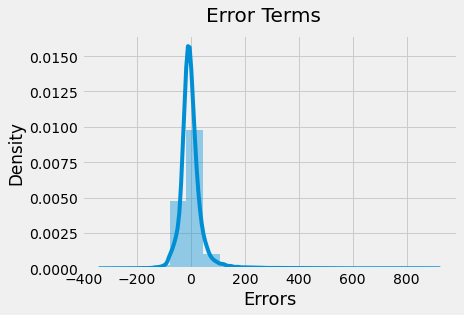

In [177]:
#Residual lanalysis
import seaborn as sns
y_train_eui = lr_3.predict(x_train_lm)
#error terms histogram
fig = plt.figure()
sns.distplot((y1_train - y_train_eui), bins= 20)
fig.suptitle('Error Terms', fontsize = 20)
plt.xlabel('Errors',fontsize = 18)

In [178]:
# error resembles our distribution at start
X.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75757 entries, 0 to 75756
Data columns (total 58 columns):
 #   Column                                                   Non-Null Count  Dtype  
---  ------                                                   --------------  -----  
 0   floor_area                                               75757 non-null  float64
 1   ELEVATION                                                75757 non-null  float64
 2   days_above_90F                                           75757 non-null  int64  
 3   State_Factor_State_1                                     75757 non-null  uint8  
 4   State_Factor_State_10                                    75757 non-null  uint8  
 5   State_Factor_State_11                                    75757 non-null  uint8  
 6   State_Factor_State_2                                     75757 non-null  uint8  
 7   State_Factor_State_8                                     75757 non-null  uint8  
 8   facility_type_2to4_Unit_Bu

In [233]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
#train2.columns = train2.columns.to_series().apply(lambda x: x.strip())
np.random.seed(0)
dtrain6,dtest = train_test_split(train2,train_size=.7,test_size=.3,random_state=100)
dtest.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22728 entries, 23673 to 212
Data columns (total 78 columns):
 #   Column                                                   Non-Null Count  Dtype  
---  ------                                                   --------------  -----  
 0   floor_area                                               22728 non-null  float64
 1   energy_star_rating                                       14695 non-null  float64
 2   ELEVATION                                                22728 non-null  float64
 3   avg_temp                                                 22728 non-null  float64
 4   snowfall_inches                                          22728 non-null  float64
 5   days_below_20F                                           22728 non-null  int64  
 6   days_above_90F                                           22728 non-null  int64  
 7   id                                                       22728 non-null  int64  
 8   site_eui                

In [234]:
num_vars =['site_eui','floor_area','energy_star_rating','ELEVATION','avg_temp','snowfall_inches','days_below_20F','days_above_90F']
#num_vars1=['site_eui','ELEVATION','floor_area','days_above_90F']
dtest[num_vars] = scaler.transform(dtest[num_vars])
dtest

C:\Users\ss_le\anaconda3\lib\site-packages\pandas\core\frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


,floor_area,energy_star_rating,ELEVATION,avg_temp,snowfall_inches,days_below_20F,days_above_90F,id,site_eui,State_Factor_State_1,...,facility_type_Retail_Uncategorized,facility_type_Retail_Vehicle_dealership_showroom,facility_type_Service_Drycleaning_or_Laundry,facility_type_Service_Uncategorized,facility_type_Service_Vehicle_service_repair_shop,facility_type_Warehouse_Distribution_or_Shipping_center,facility_type_Warehouse_Nonrefrigerated,facility_type_Warehouse_Refrigerated,facility_type_Warehouse_Selfstorage,facility_type_Warehouse_Uncategorized
23673,58430.0,NaN,42.7,57.366120,9.6,5.0,17.0,23673,246.761900,0,...,0,0,0,0,0,0,0,0,0,0
46880,866928.0,55.0,25.6,56.835616,49.1,34.0,12.0,46880,94.291097,0,...,0,0,0,0,0,0,0,0,0,0
69734,24711.0,83.0,18.3,55.693151,0.0,0.0,2.0,69734,22.017953,0,...,0,0,0,0,0,0,0,0,0,0
52682,29686.0,NaN,10.7,57.215847,36.0,11.0,17.0,52682,440.493169,0,...,0,0,0,0,1,0,0,0,0,0
49390,104052.0,NaN,42.7,56.835616,49.1,34.0,12.0,49390,98.695163,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74268,53540.0,96.0,26.5,55.147541,1.4,0.0,3.0,74268,84.192918,0,...,0,0,0,0,0,0,0,0,0,0
6448,138872.0,76.0,47.5,54.651685,31.6,26.0,17.0,6448,98.936372,0,...,0,0,0,0,0,0,0,0,0,0
71103,24570.0,55.0,18.3,55.693151,0.0,0.0,2.0,71103,29.371654,0,...,0,0,0,0,0,0,0,0,0,0
14168,757935.0,81.0,205.7,53.562674,27.3,42.0,40.0,14168,80.549678,0,...,0,0,0,0,0,0,0,0,0,0


In [249]:
#dtest.info()
y_test = dtest.pop('site_eui')
X_test = dtest
x_test_m4 = sm.add_constant(X_test)
x_test_m4 = x_test_m4.drop(['avg_temp','id','snowfall_inches','energy_star_rating','facility_type_Public_Assembly_Other','facility_type_Public_Assembly_Recreation','facility_type_Public_Assembly_Stadium','facility_type_Mixed_Use_Predominantly_Residential','facility_type_5plus_Unit_Building','State_Factor_State_4','facility_type_Mixed_Use_Commercial_and_Residential','facility_type_Multifamily_Uncategorized'],1,)
x_test_m4 =x_test_m4.drop(['days_below_20F','facility_type_Public_Assembly_Movie_Theater','building_class_Residential','building_class_Commercial','facility_type_Office_Uncategorized','State_Factor_State_6','facility_type_Education_Other_classroom'],1,)
y_pred_m4 = lr_3.predict(x_test_m4)
#print(x_test_m4.info())
#print(x_train_lm())

KeyError: 'site_eui'

In [237]:
from sklearn.metrics import r2_score
r2_score(y_true=y_test,y_pred=y_pred_m4)

0.2234200856139278

In [248]:
#x_test_m4.head()
y_pred_m4

23673     83.439059
46880     88.220235
69734     32.084234
52682    141.160706
49390     84.355217
            ...    
74268     55.515380
6448      72.343200
71103     32.083559
14168     81.597123
212       54.425048
Length: 22728, dtype: float64

In [243]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75757 entries, 0 to 75756
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          75757 non-null  int64  
 1   floor_area          75757 non-null  float64
 2   energy_star_rating  49048 non-null  float64
 3   ELEVATION           75757 non-null  float64
 4   avg_temp            75757 non-null  float64
 5   snowfall_inches     75757 non-null  float64
 6   days_below_20F      75757 non-null  int64  
 7   days_above_90F      75757 non-null  int64  
 8   State_Factor        75757 non-null  object 
 9   building_class      75757 non-null  object 
 10  facility_type       75757 non-null  object 
 11  id                  75757 non-null  int64  
 12  site_eui            75757 non-null  float64
dtypes: float64(6), int64(4), object(3)
memory usage: 7.5+ MB


In [251]:
test_data=data2[["floor_area","energy_star_rating","ELEVATION","avg_temp","snowfall_inches","days_below_20F","days_above_90F","State_Factor","building_class","facility_type","id"]].copy()

In [263]:
#data2=data2.reset_index()
#test_data=pd.get_dummies(test_data)
yfin_test = data2.pop('id')

In [264]:
#yfin_test = data2.pop('id')
Xfin_test = test_data
x_test_m5 = sm.add_constant(Xfin_test)
x_test_m5 = x_test_m5.drop(['avg_temp','id','snowfall_inches','energy_star_rating','facility_type_Public_Assembly_Other','facility_type_Public_Assembly_Recreation','facility_type_Public_Assembly_Stadium','facility_type_Mixed_Use_Predominantly_Residential','facility_type_5plus_Unit_Building','State_Factor_State_4','facility_type_Mixed_Use_Commercial_and_Residential','facility_type_Multifamily_Uncategorized'],1,)
x_test_m5 =x_test_m5.drop(['days_below_20F','facility_type_Public_Assembly_Movie_Theater','building_class_Residential','building_class_Commercial','facility_type_Office_Uncategorized','facility_type_Education_Other_classroom'],1,)
y_pred_m5 = lr_3.predict(x_test_m5)

C:\Users\ss_le\AppData\Local\Temp/ipykernel_52128/1264081909.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  x_test_m5 = x_test_m5.drop(['avg_temp','id','snowfall_inches','energy_star_rating','facility_type_Public_Assembly_Other','facility_type_Public_Assembly_Recreation','facility_type_Public_Assembly_Stadium','facility_type_Mixed_Use_Predominantly_Residential','facility_type_5plus_Unit_Building','State_Factor_State_4','facility_type_Mixed_Use_Commercial_and_Residential','facility_type_Multifamily_Uncategorized'],1,)
C:\Users\ss_le\AppData\Local\Temp/ipykernel_52128/1264081909.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  x_test_m5 =x_test_m5.drop(['days_below_20F','facility_type_Public_Assembly_Movie_Theater','building_class_Residential','building_class_Commercial','facility_type_Office_Uncategorized','

In [265]:
y_pred_m5

0       226.220834
1       225.661629
2       225.470682
3       226.149114
4       226.385162
           ...    
9700     47.152623
9701     55.426077
9702     45.889457
9703     45.807853
9704     55.477513
Length: 9705, dtype: float64

In [266]:
#yfin_test = df.rename(columns = {'fit': 'fit_feature'})
r2_score(y_true = yfin_test,y_pred=y_pred_m5)

-826.3713950988077